In [21]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np

In [22]:
filename = '../data/K19 UAS IKBSR 22-25hpi 260818_2_Position002 wt.csv'
dataframe = pd.read_csv(filename,header=1)

In [23]:
# preview the structure of the data
dataframe[:5]

,Time [s],Position X::1000009969,Position X::1000009970,Position X::1000009971,Position X::1000009973,Position X::1000009974,Position X::1000009975,Position X::1000009978,Position X::1000009980,Position X::1000009981,...,Position Z::1000032625,Position Z::1000032626,Position Z::1000057514,Position Z::1000057524,Position Z::1000057526,Position Z::1000065253,Position Z::1000065360,Position Z::1000067275,Position Z::1000067573,Position Z::1000067897
0,0.00,216.217,150.529,334.670,442.723,505.333,122.135,56.4980,64.4170,48.2063,...,1713.07,1710.77,1718.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90.00,216.822,155.610,337.630,443.138,506.936,115.366,57.4302,64.9332,48.6072,...,1712.91,1710.73,1719.02,1716.47,1724.93,NaN,NaN,NaN,NaN,NaN
2,179.99,217.139,156.675,342.580,443.921,511.090,110.095,56.8257,64.9173,48.7309,...,1712.83,1710.72,1719.48,1714.71,1726.36,NaN,NaN,NaN,NaN,NaN
3,269.97,217.406,157.395,344.622,446.172,513.563,106.890,63.8380,64.9173,49.0252,...,1712.29,1710.42,1719.06,1713.36,1724.85,NaN,NaN,NaN,NaN,NaN
4,359.99,217.646,158.873,346.379,450.091,517.370,106.348,71.0109,65.1359,48.1958,...,1711.85,1710.28,1719.41,1713.74,1723.94,NaN,NaN,NaN,NaN,NaN


In [24]:
# extract the track IDs
rawnames = list(dataframe)
rawnames = rawnames[1:]
rawnames = [n.replace('Position ','') for n in rawnames]
trackIDs = np.unique([n.replace('X::','').replace('Y::','').replace('Z::','') for n in rawnames])
num_tracks = len(trackIDs)
num_timepoints = len(dataframe['Time [s]'].values)
num_tracks, num_timepoints

(30, 140)

In [25]:
reshapeddata = pd.DataFrame({'trackID':np.repeat(trackIDs,num_timepoints),
                             'time':np.tile(dataframe['Time [s]'],num_tracks),
                             'x':dataframe.values[:,1:num_tracks+1].reshape((num_tracks*num_timepoints,),order='F'),
                             'y':dataframe.values[:,num_tracks+1:2*num_tracks+1].reshape((num_tracks*num_timepoints,),order='F'),
                             'z':dataframe.values[:,2*num_tracks+1:3*num_tracks+1].reshape((num_tracks*num_timepoints,),order='F')})

In [26]:
reshapeddata

,trackID,time,x,y,z
0,1000009969,0.00,216.2170,320.137,1721.44
1,1000009969,90.00,216.8220,320.429,1721.07
2,1000009969,179.99,217.1390,320.402,1721.23
3,1000009969,269.97,217.4060,320.660,1721.02
4,1000009969,359.99,217.6460,321.079,1720.73
5,1000009969,449.98,219.1010,321.790,1720.17
6,1000009969,539.97,219.2760,322.260,1719.70
7,1000009969,629.98,220.2200,329.468,1716.24
8,1000009969,719.99,221.1050,335.897,1713.84
9,1000009969,809.95,221.6350,337.601,1712.92


In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [28]:
from inference.walker_inference import BiasedPersistentInferer, prepare_paths

In [29]:
from in_silico.sources import PointSource

<IPython.core.display.Javascript object>


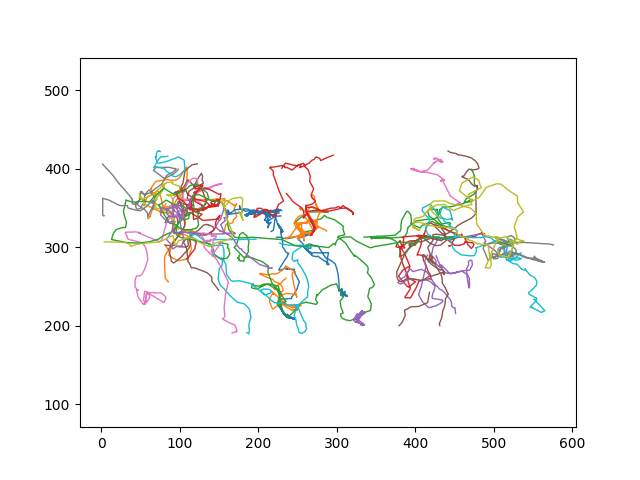

(-27.373331500000003, 604.8693015, 178.1132, 434.47479999999996)

In [30]:
fig1 = plt.figure()
for ID, tracks in reshapeddata.groupby('trackID'):
        plt.plot(tracks['x'], tracks['y'], lw=1)
plt.axis('equal')

In [16]:
fig1.savefig('tracks_WT.pdf')

In [31]:
inf = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in reshapeddata.groupby('trackID')], include_t=False), PointSource((300, 300)))


In [32]:
out = inf.multi_infer(n_walkers=20, n_steps=20000, burn_in=10000)

Beginning MCMC walk in parallel


Total acceptance Rate: 0.256. Rolling acceptance rate: 0.175:   2%|▏         | 534/30000 [00:01<01:05, 449.41it/s]

Total acceptance Rate: 0.512. Rolling acceptance rate: 0.555: 100%|██████████| 30000/30000 [01:17<00:00, 351.38it/s]
Total acceptance Rate: 0.508. Rolling acceptance rate: 0.605:  99%|█████████▊| 29570/30000 [01:17<00:01, 379.74it/s]
Total acceptance Rate: 0.574. Rolling acceptance rate: 0.615:  99%|█████████▉| 29766/30000 [01:17<00:00, 370.30it/s]
Total acceptance Rate: 0.531. Rolling acceptance rate: 0.665: 100%|██████████| 30000/30000 [01:17<00:00, 387.46it/s]
Total acceptance Rate: 0.576. Rolling acceptance rate: 0.690: 100%|██████████| 30000/30000 [01:17<00:00, 386.54it/s]
Total acceptance Rate: 0.553. Rolling acceptance rate: 0.610: 100%|██████████| 30000/30000 [01:17<00:00, 385.61it/s]
Total acceptance Rate: 0.569. Rolling acceptance rate: 0.755: 100%|██████████| 30000/30000 [01:17<00:00, 384.95it/s]
Total acceptance Rate: 0.510. Rolling acceptance rate: 0.635: 100%|██████████| 30000/30000 [01:18<00:00, 384.56it/s]
Total acceptance Rate: 0.529. Rolling acceptance rate: 0.535: 10

Completed MCMC walk in 80.25s


In [33]:
from utils.plotting import plot_wpb_dist

<IPython.core.display.Javascript object>


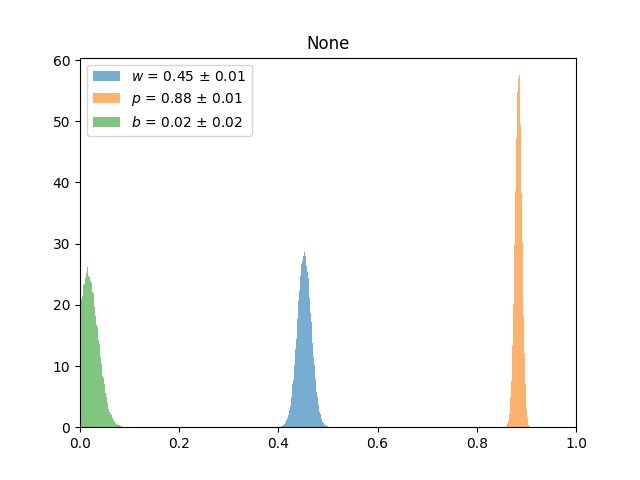

In [34]:
plot_wpb_dist(out,save_as="postis_WT.pdf")